In [ ]:
#Importing all The required Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import *
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# Defining Colours
col1 = "#3F5D7D"  # nice deep blue
col2 = '#ff7f0e'  # orange color
col3 = '#1f77b4'  # another shade of blue
colbkg = 'grey'  # background color
bkgalpha = 0.3  # background transparency
plt.rcParams["figure.figsize"] = 10.5, 7  # setting default figure size for plots


In [ ]:
# Function to prepare and plot graph
def prepare_plot():
    left, width = 0.5, 0.5  # left position and width of the plot
    bottom, height = 2.83, 0.35  # bottom position and height of the plot
    rect_box1 = [left, bottom, width, height]  # coordinates of the plot rectangle
    fig = plt.figure(facecolor="w")  # create a figure with a white background
    box1 = plt.axes(rect_box1)  # create an axes object within the figure with the specified rectangle
    box1.set_ylim(0., 8.2)  # set the y-axis limits of the plot
    box1.set_xlim(-5., 125.)  # set the x-axis limits of the plot
    box1.xaxis.set_major_locator(FixedLocator([50, 100]))  # set major tick locations on the x-axis
    box1.tick_params(which='major', axis='y', labelsize=14)  # set tick parameters for the y-axis
    box1.tick_params(which='major', axis='x', labelsize=0)  # hide tick labels on the x-axis
    box1.set_ylabel(r'Counts s$^{-1}$', fontsize=14)  # set the label for the y-axis
    return fig, box1  # return the figure and the axes objects


In [ ]:
# Function for Gaussian Process Regression and Plotting
def process_and_plot(data_file, box, juldate_zero=None, col1=col1, col2=col2, noise_std=0.1, length_scale=1.5):
    data = np.genfromtxt(data_file)  # load data from a file into a numpy array
    juldate = data[:, 1]  # extract the second column (index 1) from the data
    juldate_zero = juldate_zero if juldate_zero is not None else juldate.min()  # set the reference julian date if not provided
    tsec = juldate - juldate_zero  # calculate the time in seconds relative to the reference julian date
    t = tsec / 1000.0  # convert time to seconds
    y = data[:, 2]  # extract the third column (index 2) from the data
    bkg = data[:, 4]  # extract the fifth column (index 4) from the data

    y_noisy = y + bkg  # add background to the observed data

    X = t.reshape(-1, 1)  # reshape the time array for input to the Gaussian Process Regressor
    y = y.reshape(-1, 1)  # reshape the observed data array
    num_training_data = X.shape[0]  # or y.shape[0]
    print("Number of training data points:", num_training_data)

    y_train_noisy = y_noisy.reshape(-1, 1)  # reshape the noisy data array

    kernel = RBF(length_scale=length_scale) + WhiteKernel(noise_level=0.1)  # create a kernel for the Gaussian Process Regressor
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=0, normalize_y=True)  # create a Gaussian Process Regressor with the specified kernel
    gpr.fit(X, y)  # fit the Gaussian Process Regressor to the data
    y_pred, sigma = gpr.predict(X, return_std=True)  # predict the values and uncertainty using the trained model

    box.plot(t, y, color=col1, linewidth=1.5, label='Observations')  # plot the observed data
    plt.errorbar(
        X,
        y_noisy,
        noise_std,
        linestyle="None",
        color="tab:red",
        marker=".",
        markersize=5,
        label="Error",
    )  # plot error bars representing noise in the data
    box.plot(t, y_pred, color=col2, linewidth=1.5, label='Gaussian Process')  # plot the Gaussian Process predictions
    box.fill_between(t, y_pred - 2 * sigma, y_pred + 2 * sigma, color=col2, alpha=0.2, label=r"95% confidence interval")  # fill the area between predictions with uncertainty
    return juldate_zero  # return the reference julian date


In [ ]:
# Function to combine data from multiple files
def combine_data_files(data_files):
    data_combined = np.array([])  # initialize an empty numpy array
    for data_file in data_files:
        data = np.genfromtxt(data_file)  # load data from a file into a numpy array
        if data_combined.size == 0:  # if the combined data array is still empty
            data_combined = data  # set the combined data array to the data array
        else:  # if the combined data array is not empty
            data_combined = np.concatenate((data_combined, data))  # concatenate the data array to the combined data array
    return data_combined  # return the combined data array


In [ ]:
# Data files
data_files = ['fvar_soft_dt1000_ob1.dat', 'fvar_soft_dt1000_ob2.dat', 'fvar_soft_dt1000_ob3.dat',
              'fvar_soft_dt1000_ob4.dat', 'fvar_soft_dt1000_ob5.dat', 'fvar_soft_dt1000_ob6.dat']


Number of training data points: 123


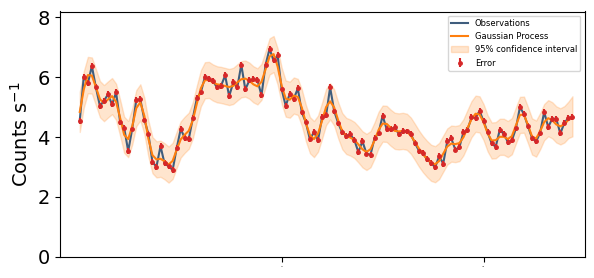

441220800.0


In [ ]:
# Plotting
fig, box1 = prepare_plot()  # create the figure and the first axes object
juldate_zero = process_and_plot(data_files[0], box1)  # process and plot the first data file on the first axes object
plt.legend(loc='upper right', fontsize="6")  # add a legend to the plot
plt.show()  # display the plot
print(juldate_zero)

In [ ]:
# Combine the data files
data_combined = combine_data_files(data_files[1:-1])
data_combined
np.savetxt('fvar_soft_dt1000_combined.dat', data_combined)

Number of training data points: 481


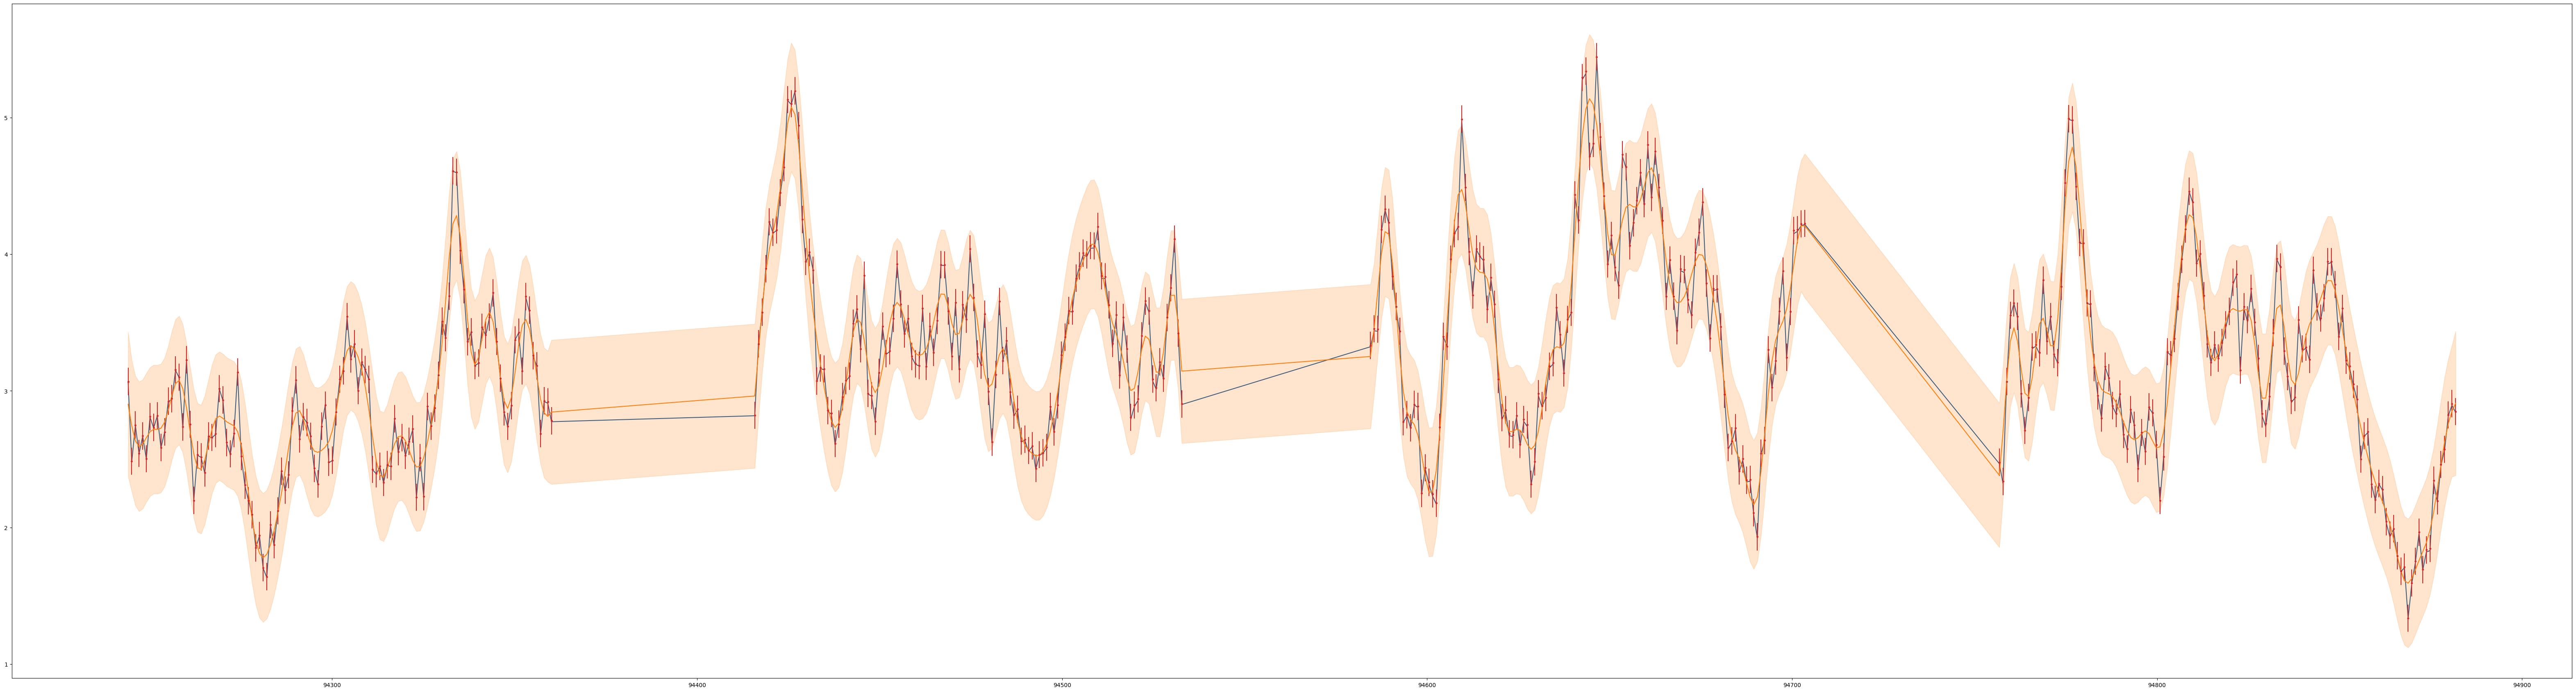

In [ ]:
#Rectangular Box2
left, width = 0.7, 0.7  # left position and width of the plot
bottom, height = 5.83, 2.35  # bottom position and height of the plot
bottom_h = left_h = left + width + 0.02  # new positions for the second axes object
width2 = 5.95  # new width for the second axes object
rect_box2 = [left_h, bottom, width2, height]  # coordinates of the plot rectangle for the second axes object
box2 = plt.axes(rect_box2)  # create the second axes object

# Process and plot the combined data file on the second axes object
process_and_plot('fvar_soft_dt1000_combined.dat', box2, juldate_zero)

plt.show()  # display the plot

Number of training data points: 118


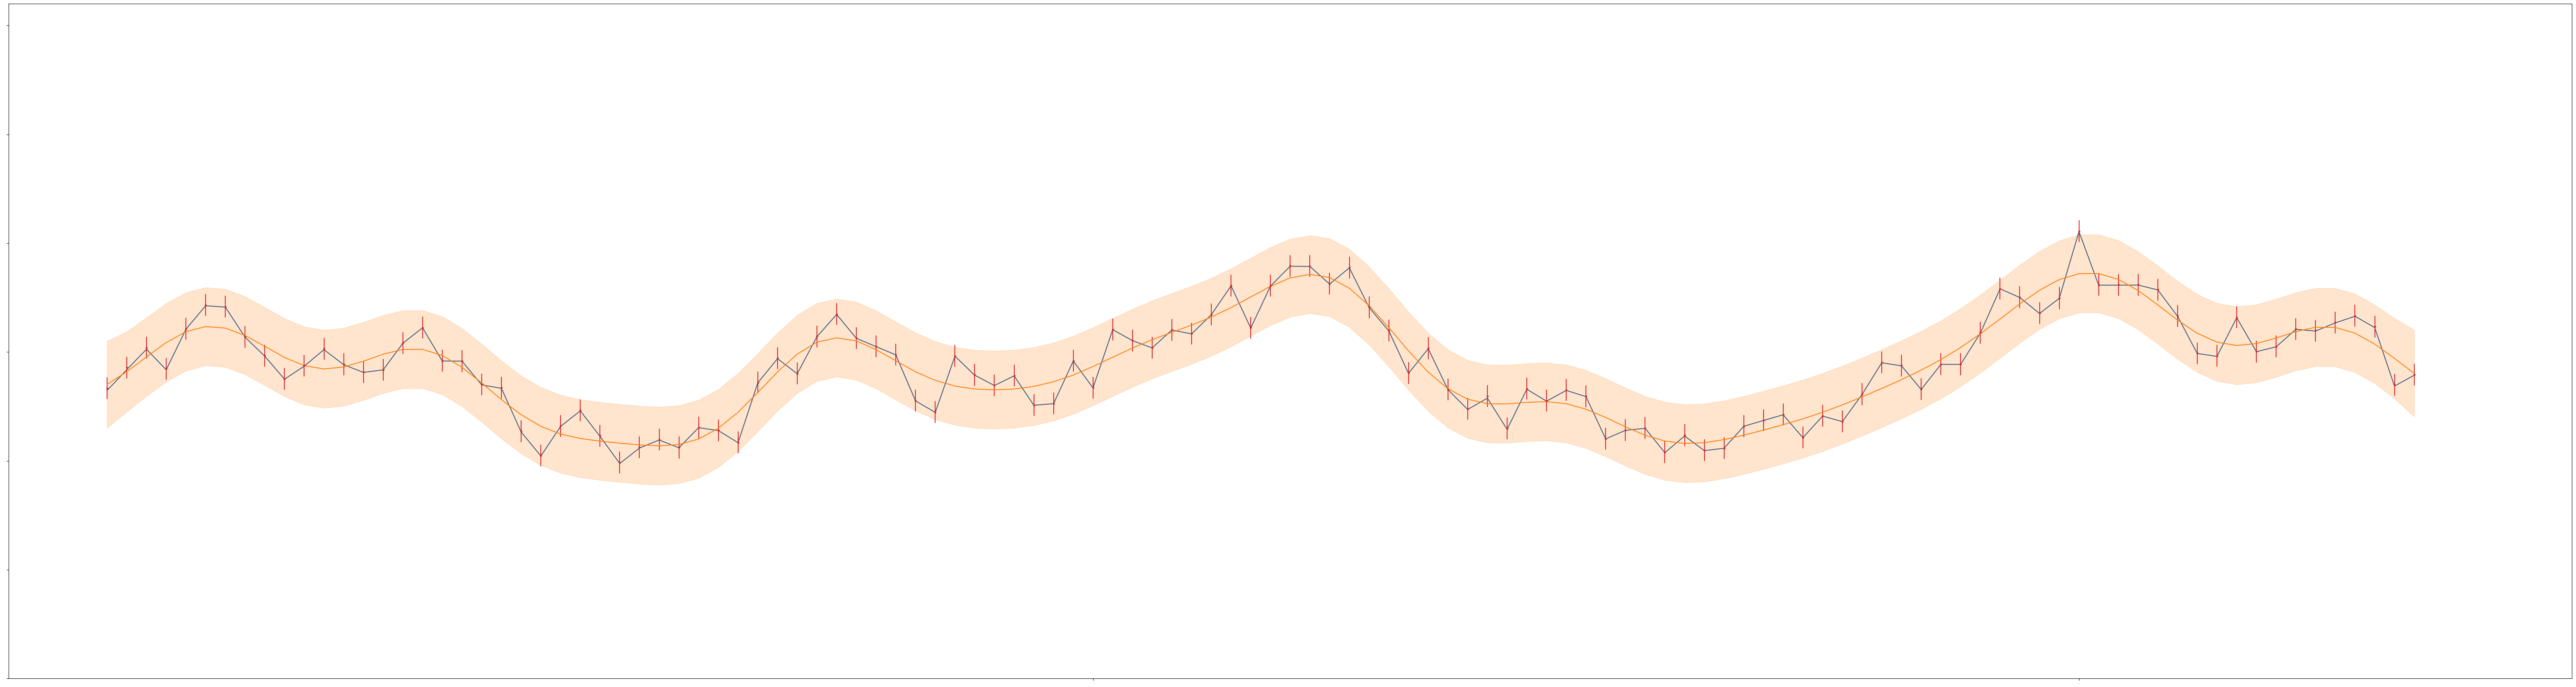

In [ ]:
# Rectangular Box3
rect_box3 = [left_h, bottom, width2, height]  # coordinates of the plot rectangle for the third axes object
box3 = plt.axes(rect_box3)  # create the third axes object
box3.set_ylim(0.,6.2)  # set the y-axis limits of the plot
box3.set_xlim(-5.,125.)  # set the x-axis limits of the plot
box3.xaxis.set_major_locator(FixedLocator([50,100]))  # set major tick locations on the x-axis
box3.tick_params(which='major',axis='both', labelsize=0)  # hide tick labels on both axes

process_and_plot(data_files[-1], box3)  # process and plot the last data file on the third axes object
plt.show()  # display the plot


In [ ]:
def process_and_plot_ARMA(data_file, box, juldate_zero=None, col1=col1, col2=col2, order=(1, 0, 1), sigma=0.1):
    data = np.genfromtxt(data_file)
    juldate = data[:, 1]
    juldate_zero = juldate_zero if juldate_zero is not None else juldate.min()
    tsec = juldate - juldate_zero
    t = tsec / 1000.0
    y = data[:, 2]
    bkg = data[:, 4]
    y_noisy = y + bkg

    X = t.reshape(-1, 1)
    y = y.reshape(-1, 1)
    num_training_data = X.shape[0]
    print("Number of training data points:", num_training_data)

    y_train_noisy = y_noisy.reshape(-1, 1)

    model = ARIMA(y_train_noisy, order=order)
    model_fit = model.fit()
    y_pred = model_fit.predict(start=0, end=num_training_data-1)

    box.plot(t, y, color=col1, linewidth=1.5)
    plt.errorbar(
        X,
        y_noisy,
        sigma,
        linestyle="None",
        color="tab:red",
        marker=".",
        markersize=5,
        label="Error",
    )
    box.plot(t, y_pred, color=col2, linewidth=1.5, label='ARMA Model')

    return juldate_zero

Number of training data points: 123


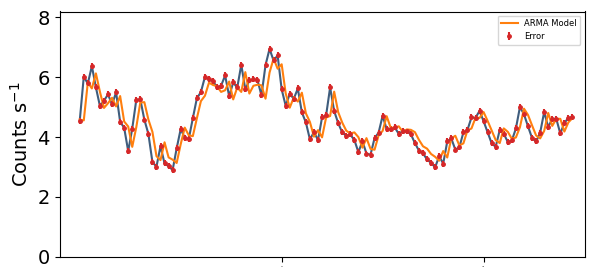

441220800.0


In [ ]:
# Plotting box 1 ARMA Model
fig, box1 = prepare_plot()
juldate_zero = process_and_plot_ARMA(data_files[0], box1)
plt.legend(loc='upper right', fontsize="6")
plt.show()
print(juldate_zero)


Number of training data points: 481


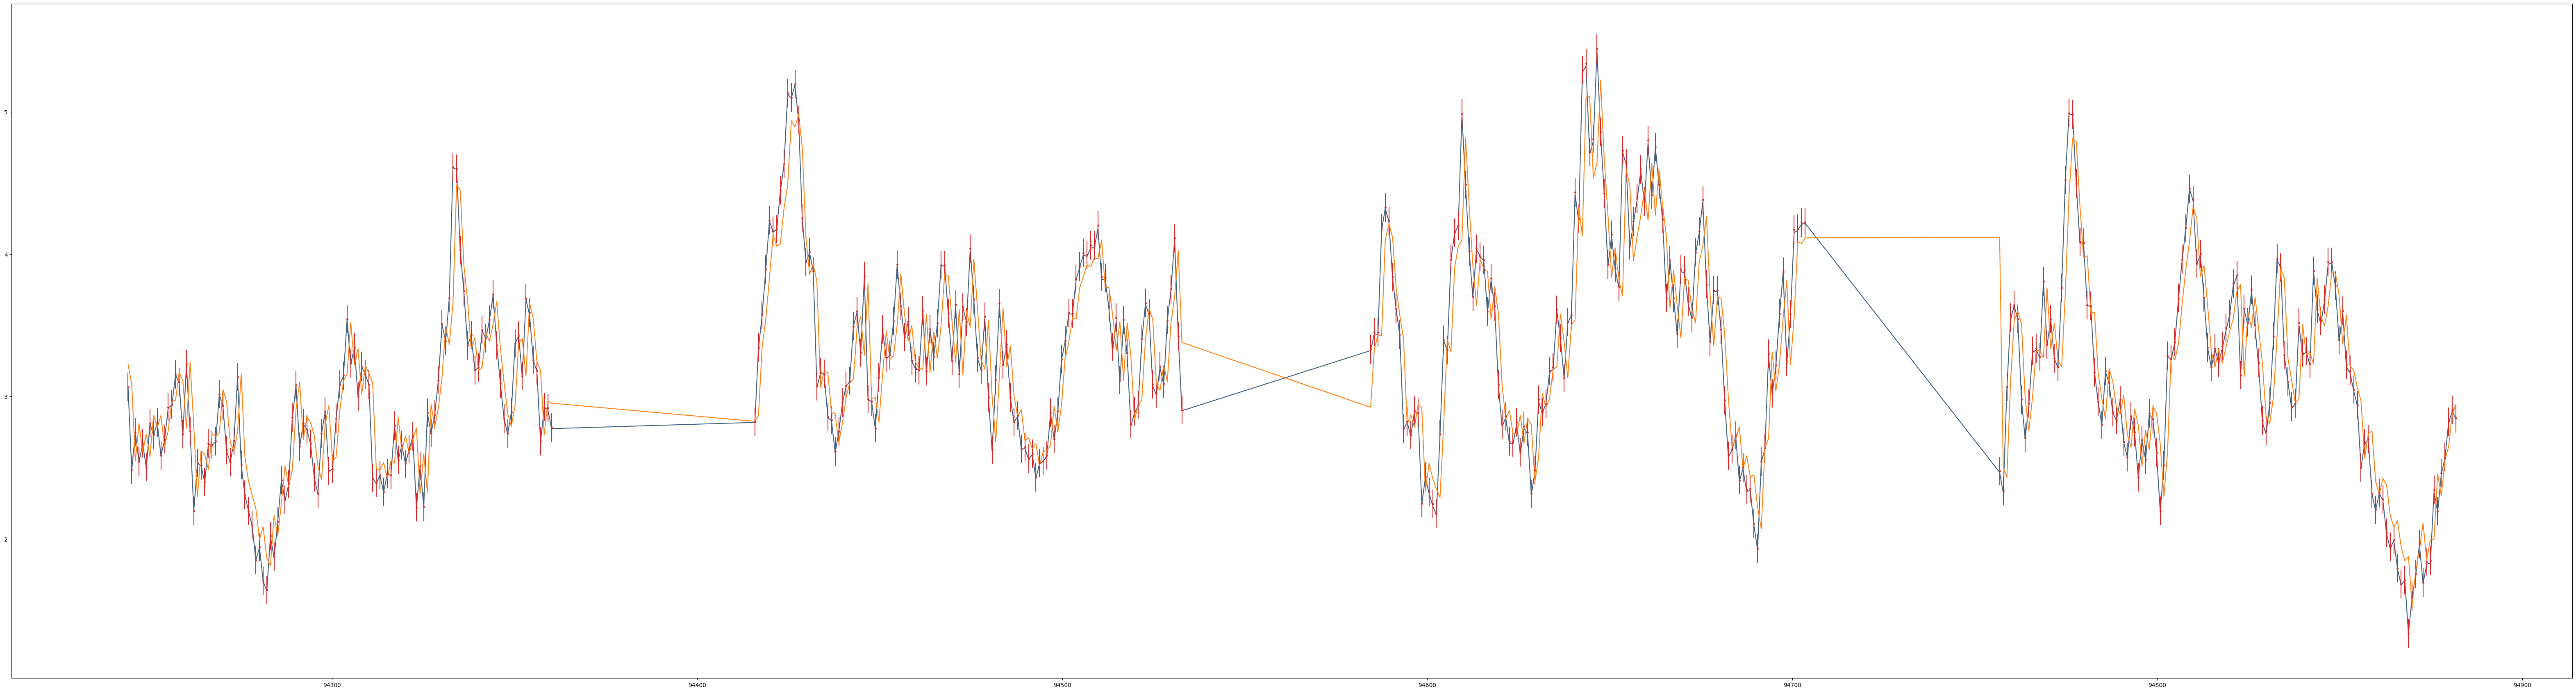

In [ ]:
#Rectangular Box2
left, width = 0.7, 0.7  # left position and width of the plot
bottom, height = 5.83, 2.35  # bottom position and height of the plot
bottom_h = left_h = left + width + 0.02  # new positions for the second axes object
width2 = 5.95  # new width for the second axes object
rect_box2 = [left_h, bottom, width2, height]  # coordinates of the plot rectangle for the second axes object
box2 = plt.axes(rect_box2)  # create the second axes object

# Process and plot the combined data file on the second axes object
process_and_plot_ARMA('fvar_soft_dt1000_combined.dat', box2, juldate_zero)

plt.show()  # display the plot

Number of training data points: 118


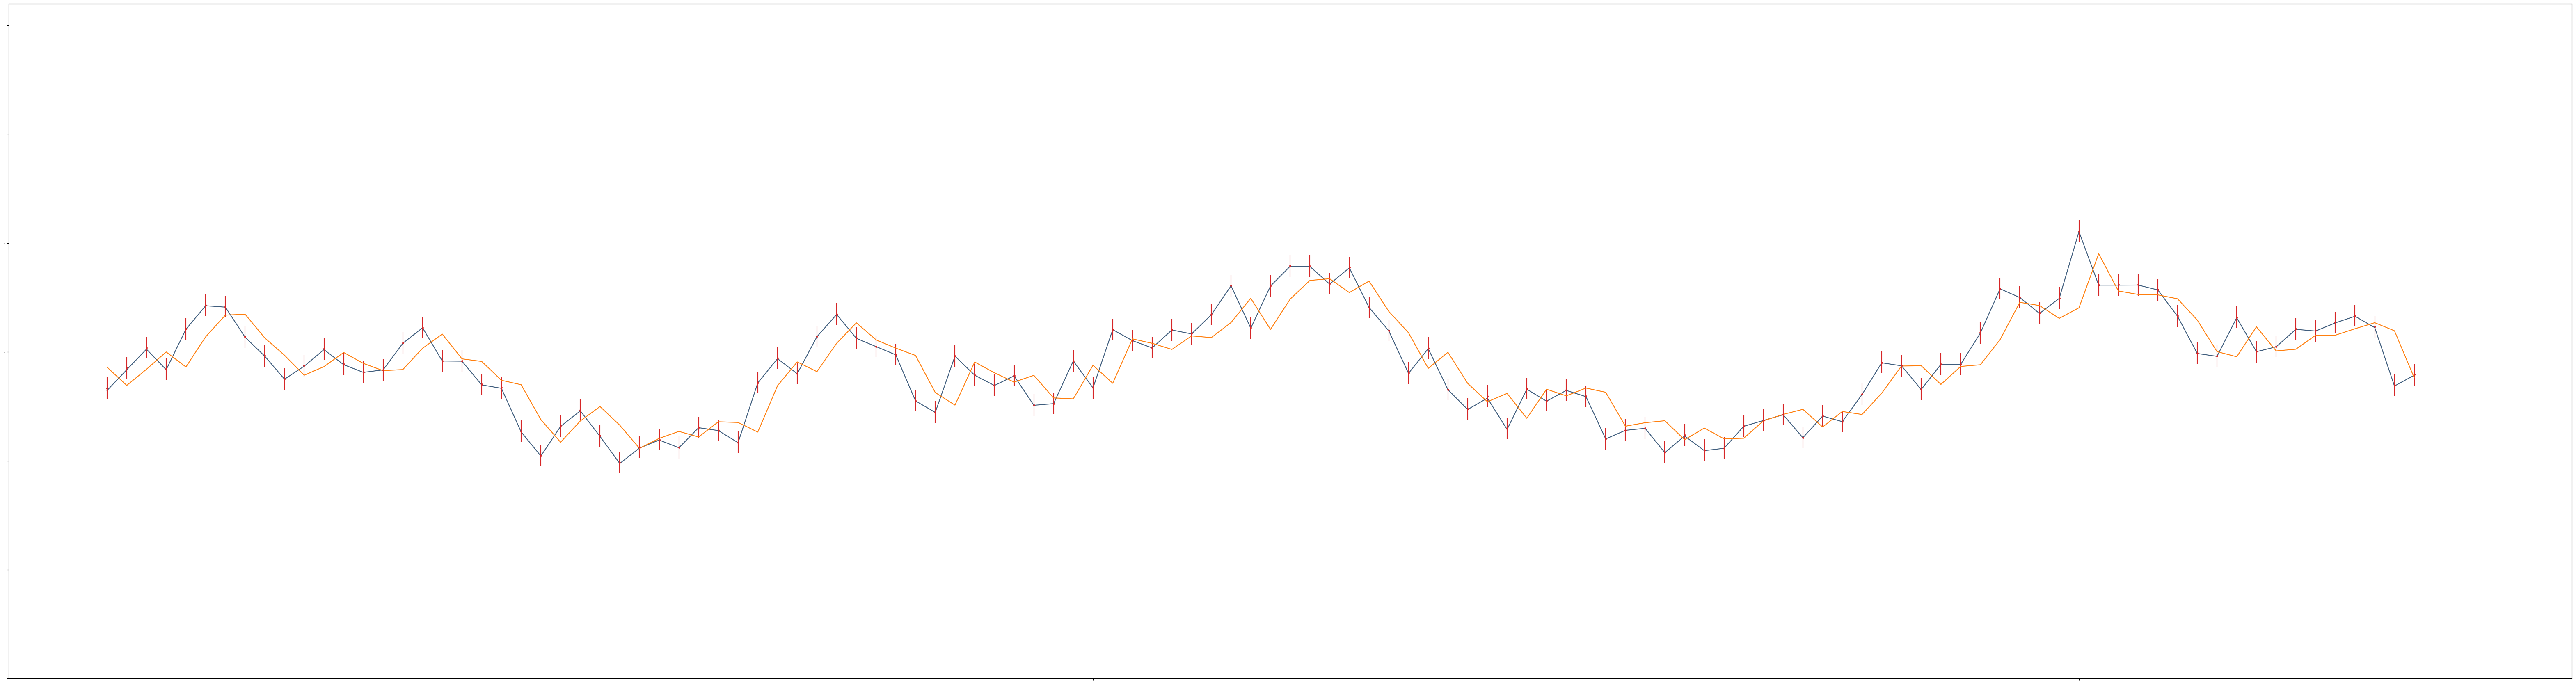

In [ ]:
# Rectangular Box3
rect_box3 = [left_h, bottom, width2, height]
box3 = plt.axes(rect_box3)
box3.set_ylim(0.,6.2)
box3.set_xlim(-5.,125.)
box3.xaxis.set_major_locator(FixedLocator([50,100]))
box3.tick_params(which='major',axis='both', labelsize=0)

process_and_plot_ARMA(data_files[-1], box3)
plt.show()